In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats
import itertools
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
EATSFin = pd.read_csv("Exercise.csv")

In [3]:
list(EATSFin)

['Date', 'Vendor Name', 'Country', 'Product', ' Gross Bookings ', ' Fees ']

In [4]:
EATSFin.head()

Date Vendor Name    Country    Product  Gross Bookings     Fees 
0  1/1/15    Vendor A  Country 1  Product 1            63.34     0.94
1  1/1/15    Vendor A  Country 2  Product 2         39295.41  2169.53
2  1/1/15    Vendor A  Country 3  Product 3           127.25     3.44
3  1/1/15    Vendor A  Country 4  Product 1             4.85     0.11
4  1/1/15    Vendor A  Country 5  Product 4          4734.94   171.13

In [5]:
EATSFin.tail()

Date Vendor Name     Country     Product  Gross Bookings     Fees 
7906  4/1/16    Vendor A  Country 32   Product 9         29573.34   504.32
7907  4/1/16    Vendor A  Country 27   Product 2            79.98     6.79
7908  4/1/16    Vendor A  Country 37   Product 4         122769.7  8156.34
7909  4/1/16    Vendor A  Country 28   Product 2           167.76    14.24
7910  4/1/16    Vendor A  Country 70  Product 14            23.35     1.12

Some intitial observations:
1. Dataset spans over 13-month period
2. Various Vendors, Countries and Products
3. Huge ranges between rows

In [6]:
EATSFin.describe()

Date Vendor Name    Country    Product  Gross Bookings   Fees 
count     7911        7911       7907       7911             7911   7911
unique      16          10         78         22             7304   5763
top     4/1/16    Vendor A  Country 2  Product 4            $-      0.02
freq       694        5629        320       1580              238     65

There is obviously something wrong with data format since summary statistics are not being printed out from .describe()

# Data Cleaning

In [7]:
#Checking each column's data type to see what may be cause.
EATSFin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7911 entries, 0 to 7910
Data columns (total 6 columns):
Date                7911 non-null object
Vendor Name         7911 non-null object
Country             7907 non-null object
Product             7911 non-null object
 Gross Bookings     7911 non-null object
 Fees               7911 non-null object
dtypes: object(6)
memory usage: 370.9+ KB


Bingo! The column types are non-null objects.

Need to change the columns with numbers from obj-->numeric

Another thing to notice here is that Country column has 4 rows that are not present since the whole data set technically has 7911 rows.

Before changing data types, need to covert null values to: NaN's.

In [8]:
#Locate all null's aka string -'$-' in Gross Bookings

mask = np.column_stack([EATSFin[' Gross Bookings '].str.contains(r"\$", na=False) for col in EATSFin])
EATSFin.loc[mask.any(axis=1)]

Date Vendor Name     Country     Product  Gross Bookings       Fees 
281   1/1/15    Vendor F   Country 2   Product 6            $-        160.94
283   1/1/15    Vendor D   Country 2  Product 16            $-       9709.01
359   2/1/15    Vendor D   Country 2  Product 16            $-       6589.98
520   2/1/15    Vendor F   Country 2   Product 6            $-        191.28
643   3/1/15    Vendor D   Country 2  Product 16            $-       7655.64
681   3/1/15    Vendor F   Country 2   Product 6            $-         170.9
950   4/1/15    Vendor F   Country 2   Product 6            $-        139.99
1203  4/1/15    Vendor D   Country 2  Product 16            $-      12426.51
1324  5/1/15    Vendor F   Country 2   Product 6            $-        175.19
1369  5/1/15    Vendor D   Country 2  Product 16            $-       31203.5
1613  5/1/15    Vendor D   Country 2  Product 14            $-         $-   
1637  6/1/15    Vendor D   Country 2  Product 16            $-      41553.29
1884  6/1/15    Vendor F   Country 2   Product 6            $-        572.66
2020  7/1/15    Vendor F  Country 49   Product 4            $-          0.07
2021  7/1/15    Vendor F  Country 62   Product 4            $-          0.54
2023  7/1/15    Vendor F   Country 2   Product 6            $-        440.37
2046  7/1/15    Vendor F  Country 32   Product 4            $-          0.06
2047  7/1/15    Vendor F   Country 5   Product 4            $-          0.08
2048  7/1/15    Vendor F  Country 26   Product 4            $-          0.04
2049  7/1/15    Vendor F  Country 35   Product 4            $-          2.15
2051  7/1/15    Vendor D   Country 2  Product 14            $-         $-   
2123  7/1/15    Vendor F  Country 42   Product 4            $-          0.08
2124  7/1/15    Vendor F  Country 25   Product 4            $-          0.26
2125  7/1/15    Vendor F  Country 50   Product 4            $-          0.38
2127  7/1/15    Vendor F  Country 12   Product 4            $-          0.15
2166  7/1/15    Vendor F  Country 34   Product 4            $-          0.21
2167  7/1/15    Vendor F   Country 7   Product 4            $-          1.02
2168  7/1/15    Vendor F   Country 6   Product 4            $-          0.17
2169  7/1/15    Vendor F   Country 4   Product 4            $-          0.01
2170  7/1/15    Vendor F  Country 58   Product 4            $-          0.01
...      ...         ...         ...         ...              ...        ...
6712  3/1/16    Vendor F   Country 2   Product 6            $-        356.48
6816  3/1/16    Vendor F  Country 38   Product 4            $-          6.56
6821  3/1/16    Vendor D   Country 2  Product 16            $-      92336.91
6900  3/1/16    Vendor F  Country 72   Product 4            $-          3.08
7000  3/1/16    Vendor F  Country 65   Product 9            $-          6.02
7003  3/1/16    Vendor F  Country 76   Product 9            $-          1.66
7065  3/1/16    Vendor F  Country 78   Product 4            $-          0.01
7072  3/1/16    Vendor F  Country 51   Product 9            $-          8.65
7153  3/1/16    Vendor F  Country 54   Product 4            $-          2.06
7155  3/1/16    Vendor F  Country 63   Product 4            $-          1.66
7158  3/1/16    Vendor F   Country 4   Product 4            $-           0.3
7160  3/1/16    Vendor F  Country 76   Product 4            $-          1.16
7161  3/1/16    Vendor F  Country 62   Product 4            $-          6.37
7226  4/1/16    Vendor F  Country 65   Product 4            $-           0.4
7230  4/1/16    Vendor F   Country 4   Product 9            $-          0.02
7237  4/1/16    Vendor F  Country 65   Product 9            $-          2.05
7334  4/1/16    Vendor D   Country 2  Product 16            $-     105315.14
7356  4/1/16    Vendor F   Country 4   Product 4            $-          0.26
7504  4/1/16    Vendor F  Country 75   Product 4            $-          2.48
7518  4/1/16    Vendor F  Country 51   Product 4            $-          0.46
7520

## 238 total rows. 238/7911 = 0.0300846922, which is approximately 3% of the data. Will eliminate all these rows since they do not represent significant portion of dataset.

In [9]:
#Locate all null's aka string -'$-' in Fees
mask = np.column_stack([EATSFin[' Fees '].str.contains(r"\$", na=False) for col in EATSFin])
EATSFin.loc[mask.any(axis=1)]

Date Vendor Name     Country     Product  Gross Bookings    Fees 
71     1/1/15    Vendor A  Country 35  Product 12            -2.33   $-   
168    1/1/15    Vendor A  Country 19  Product 10            -0.44   $-   
192    1/1/15    Vendor D   Country 2  Product 14           585.99   $-   
358    2/1/15    Vendor D   Country 2  Product 14           562.81   $-   
779    3/1/15    Vendor D   Country 2  Product 14           775.12   $-   
959    4/1/15    Vendor A  Country 35  Product 12            -3.35   $-   
960    4/1/15    Vendor A   Country 3  Product 12            -0.81   $-   
1155   4/1/15    Vendor D   Country 2  Product 14           876.09   $-   
1239   4/1/15    Vendor A  Country 30  Product 12            -0.32   $-   
1484   5/1/15    Vendor A  Country 35  Product 12           -14.94   $-   
1521   5/1/15    Vendor A  Country 55  Product 12            -2.17   $-   
1613   5/1/15    Vendor D   Country 2  Product 14            $-      $-   
1655   6/1/15    Vendor A  Country 35  Product 12            -1.92   $-   
1673   6/1/15    Vendor A   Country 3  Product 12             -0.8   $-   
1714   6/1/15    Vendor A  Country 20   Product 8            -1.07   $-   
1803   6/1/15    Vendor D   Country 2  Product 14          3865.46   $-   
1958   6/1/15    Vendor A  Country 33  Product 12            -3.46   $-   
2051   7/1/15    Vendor D   Country 2  Product 14            $-      $-   
2296   7/1/15    Vendor A   Country 5   Product 3            -2.51   $-   
2304   7/1/15    Vendor A   Country 3  Product 12            -0.72   $-   
2885   8/1/15    Vendor D   Country 2  Product 14            $-      $-   
2954   9/1/15    Vendor B  Country 36   Product 6            -0.11   $-   
3130   9/1/15    Vendor D   Country 2  Product 14            $-      $-   
3177   9/1/15    Vendor A   Country 3  Product 10             -0.2   $-   
3342   9/1/15    Vendor A   Country 3   Product 2            -0.39   $-   
3472  10/1/15    Vendor A  Country 35  Product 12            -6.07   $-   
3487  10/1/15    Vendor A  Country 25  Product 12            -1.12   $-   
3527  10/1/15    Vendor A  Country 40  Product 12            -1.75   $-   
3529  10/1/15    Vendor A   Country 7  Product 12            -7.29   $-   
3666  10/1/15    Vendor D   Country 2  Product 14          5827.43   $-   
3730  10/1/15    Vendor B  Country 36   Product 6            -2.43   $-   
4177  11/1/15    Vendor J  Country 35  Product 14            $-      $-   
4179  11/1/15    Vendor D   Country 2  Product 14          6852.68   $-   
4256  11/1/15    Vendor J  Country 54  Product 10          4862.54   $-   
4257  11/1/15    Vendor J  Country 54  Product 14            $-      $-   
4566  11/1/15    Vendor J  Country 35  Product 10            $-      $-   
4609  12/1/15    Vendor D   Country 2  Product 14            $-      $-   
4635  12/1/15    Vendor J  Country 55  Product 10            $-      $-   
4813  12/1/15    Vendor J  Country 54  Product 10          7318.96   $-   
4866  12/1/15    Vendor J  Country 54  Product 14            $-      $-   
4917  12/1/15    Vendor J  Country 35  Product 10            $-      $-   
4953  12/1/15    Vendor J  Country 35  Product 14            $-      $-   
4954  12/1/15    Vendor J  Country 55  Product 14            $-      $-   
5694   1/1/16    Vendor J  Country 54  Product 14            $-      $-   
5792   1/1/16    Vendor D   Country 2  Product 14          7404.98   $-   
5793   1/1/16    Vendor J  Country 54  Product 10          3903.49   $-   
5969   2/1/16    Vendor J  Country 54  Product 10          3998.01   $-   
6389   2/1/16    Vendor D   Country 2  Product 14            $-      $-   
6476   2/1/16    Vendor J  Country 54  Product 14            $-      $-   
7073   3/1/16    Vendor D   Country 2  Product 14         11725.73   $-   
7729   4/1/16    Vendor D   Country 2  Product 14            $-      $-

In [10]:
mask = np.column_stack([EATSFin[' Fees '].str.contains(r"\$", na=False) for col in EATSFin])
EATSFin.loc[mask.any(axis=1)].count()

Date                51
Vendor Name         51
Country             51
Product             51
 Gross Bookings     51
 Fees               51
dtype: int64

## 51 total rows. 51/7911 = 0.00644671975, which is approximately 0.6% of the data. Can afford to take out all these rows as well.

After dropping rows with '$-', dataframe should be between the size: 7673 and 7622 (assuming there are no character overlaps between 'Gross Bookings' and 'Fees' or character in both columns.

In [11]:
EATSFin[' Gross Bookings '] = pd.to_numeric(EATSFin[' Gross Bookings '], errors='coerce')

In [12]:
#From original data table, entry @ index: 7882, column Gross Bookings was empty and now should be filled with NaN.
EATSFin.iloc[[7882]]

Date Vendor Name    Country    Product   Gross Bookings    Fees 
7882  4/1/16    Vendor F  Country 2  Product 6               NaN  366.82

Finally- EATSFin[' Gross Bookings '] converted to NaN. Next step is to produce df w/o NaN's.

In [13]:
EATSFin[' Gross Bookings '] = pd.to_numeric(EATSFin[' Gross Bookings '], errors='coerce').dropna()

In [14]:
EATSFin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7911 entries, 0 to 7910
Data columns (total 6 columns):
Date                7911 non-null object
Vendor Name         7911 non-null object
Country             7907 non-null object
Product             7911 non-null object
 Gross Bookings     7673 non-null float64
 Fees               7911 non-null object
dtypes: float64(1), object(5)
memory usage: 370.9+ KB


As expected, ' Gross Bookings ' column reduced to 7673, but need to actually reduce the whole dataframe to that number.

Will extract rows that don't have NaN's. This should produce the desired result.

In [15]:
EATSFin2 = EATSFin[pd.notnull(EATSFin[' Gross Bookings '])]

In [16]:
EATSFin2

Date Vendor Name     Country     Product   Gross Bookings       Fees 
0     1/1/15    Vendor A   Country 1   Product 1             63.34       0.94
1     1/1/15    Vendor A   Country 2   Product 2          39295.41    2169.53
2     1/1/15    Vendor A   Country 3   Product 3            127.25       3.44
3     1/1/15    Vendor A   Country 4   Product 1              4.85       0.11
4     1/1/15    Vendor A   Country 5   Product 4           4734.94     171.13
5     1/1/15    Vendor A   Country 6   Product 2             60.74        5.1
6     1/1/15    Vendor A   Country 7   Product 5            -90.74      40.06
7     1/1/15    Vendor A   Country 8   Product 2           1460.80     844.88
8     1/1/15    Vendor B   Country 7   Product 6         381472.45   10681.23
9     1/1/15    Vendor B   Country 6   Product 6          13765.36     385.44
10    1/1/15    Vendor B   Country 9   Product 6            848.17      23.89
11    1/1/15    Vendor B  Country 10   Product 6          30663.32      858.5
12    1/1/15    Vendor C   Country 6   Product 7          31862.03     591.58
13    1/1/15    Vendor A   Country 5   Product 3             19.34       0.41
14    1/1/15    Vendor A   Country 7   Product 8            437.01      70.89
15    1/1/15    Vendor A   Country 9   Product 9           4723.55     188.87
16    1/1/15    Vendor A  Country 11   Product 4          26643.05    1721.69
17    1/1/15    Vendor A  Country 12   Product 9          87295.49    8348.98
18    1/1/15    Vendor A  Country 13   Product 9         107023.76    6491.44
19    1/1/15    Vendor A  Country 14   Product 9          20604.89    1298.19
20    1/1/15    Vendor A  Country 15   Product 4           1786.14     178.57
21    1/1/15    Vendor A  Country 16   Product 9          28246.39    1951.54
22    1/1/15    Vendor A  Country 17   Product 9           4212.07     149.53
23    1/1/15    Vendor A  Country 17   Product 4           7629.83     245.99
24    1/1/15    Vendor A  Country 18   Product 4         321351.22   20965.66
25    1/1/15    Vendor A  Country 19   Product 2            148.50       17.5
26    1/1/15    Vendor A  Country 20   Product 3             23.33       0.53
27    1/1/15    Vendor A  Country 21  Product 10             26.11       2.19
28    1/1/15    Vendor A  Country 22   Product 4             32.43       2.48
29    1/1/15    Vendor A  Country 23   Product 4          64634.77    3458.54
...      ...         ...         ...         ...               ...        ...
7880  4/1/16    Vendor F  Country 52   Product 9          88827.46    3048.93
7881  4/1/16    Vendor F  Country 47   Product 9          20959.53     713.45
7883  4/1/16    Vendor A  Country 25   Product 8           2314.62      21.01
7884  4/1/16    Vendor A  Country 37  Product 10            142.34      12.08
7885  4/1/16    Vendor B  Country 27   Product 6          11574.06     324.07
7886  4/1/16    Vendor B  Country 21   Product 6           6593.39     250.55
7887  4/1/16    Vendor B  Country 28   Product 6           3645.59     138.53
7888  4/1/16    Vendor B  Country 33   Product 6           9334.34     262.43
7889  4/1/16    Vendor B  Country 13   Product 6          37928.95    1062.41
7890  4/1/16    Vendor B  Country 47   Product 6          25526.71     742.21
7891  4/1/16    Vendor A   Country 3  Product 12          94555.36    8337.14
7892  4/1/16    Vendor A  Country 11   Product 9         118788.99    6709.93
7893  4/1/16    Vendor A  Country 11   Product 2            208.54      17.68
7894  4/1/16    Vendor A  Country 66   Product 9          88439.79    6953.34
7895  4/1/16    Vendor A  Country 47   Product 3             41.15       0.61
7896  4/1/16    Vendor A  Country 46   Product 4           7528.42     493.09
7897  4/1/16    Vendor A  Country 23   Product 9        1035481.87   73302.07
7898  4/1/16    Vendor A  Country 29   Product 9        3026843.42   199295.5
7899  4/1/16    Vendor A  Country 76   Product 2              1.69       0.14
7900  4/1/16    Vendor A   Cou

Woohoo!!! Dataframe is reduced to 7673! Awesome. Now moving onto eliminating '$-' in 'Fees'

In [17]:
EATSFin2[' Fees '] = pd.to_numeric(EATSFin2[' Fees '], errors='coerce')

In [18]:
#Test to see that rows with '$-' in 'Fees' column converted to NaN
#From original data table, entry @ index: 71, column Fees was empty and now should be filled with NaN.
EATSFin2.iloc[[71]]

Date Vendor Name     Country     Product   Gross Bookings    Fees 
71  1/1/15    Vendor A  Country 35  Product 12             -2.33     NaN

Yes! Now extract all rows from EATSFin that do not have NaN

In [19]:
EATSFin3 = EATSFin2[pd.notnull(EATSFin2[' Fees '])]

In [20]:
EATSFin3

Date Vendor Name     Country     Product   Gross Bookings       Fees 
0     1/1/15    Vendor A   Country 1   Product 1             63.34       0.94
1     1/1/15    Vendor A   Country 2   Product 2          39295.41    2169.53
2     1/1/15    Vendor A   Country 3   Product 3            127.25       3.44
3     1/1/15    Vendor A   Country 4   Product 1              4.85       0.11
4     1/1/15    Vendor A   Country 5   Product 4           4734.94     171.13
5     1/1/15    Vendor A   Country 6   Product 2             60.74       5.10
6     1/1/15    Vendor A   Country 7   Product 5            -90.74      40.06
7     1/1/15    Vendor A   Country 8   Product 2           1460.80     844.88
8     1/1/15    Vendor B   Country 7   Product 6         381472.45   10681.23
9     1/1/15    Vendor B   Country 6   Product 6          13765.36     385.44
10    1/1/15    Vendor B   Country 9   Product 6            848.17      23.89
11    1/1/15    Vendor B  Country 10   Product 6          30663.32     858.50
12    1/1/15    Vendor C   Country 6   Product 7          31862.03     591.58
13    1/1/15    Vendor A   Country 5   Product 3             19.34       0.41
14    1/1/15    Vendor A   Country 7   Product 8            437.01      70.89
15    1/1/15    Vendor A   Country 9   Product 9           4723.55     188.87
16    1/1/15    Vendor A  Country 11   Product 4          26643.05    1721.69
17    1/1/15    Vendor A  Country 12   Product 9          87295.49    8348.98
18    1/1/15    Vendor A  Country 13   Product 9         107023.76    6491.44
19    1/1/15    Vendor A  Country 14   Product 9          20604.89    1298.19
20    1/1/15    Vendor A  Country 15   Product 4           1786.14     178.57
21    1/1/15    Vendor A  Country 16   Product 9          28246.39    1951.54
22    1/1/15    Vendor A  Country 17   Product 9           4212.07     149.53
23    1/1/15    Vendor A  Country 17   Product 4           7629.83     245.99
24    1/1/15    Vendor A  Country 18   Product 4         321351.22   20965.66
25    1/1/15    Vendor A  Country 19   Product 2            148.50      17.50
26    1/1/15    Vendor A  Country 20   Product 3             23.33       0.53
27    1/1/15    Vendor A  Country 21  Product 10             26.11       2.19
28    1/1/15    Vendor A  Country 22   Product 4             32.43       2.48
29    1/1/15    Vendor A  Country 23   Product 4          64634.77    3458.54
...      ...         ...         ...         ...               ...        ...
7880  4/1/16    Vendor F  Country 52   Product 9          88827.46    3048.93
7881  4/1/16    Vendor F  Country 47   Product 9          20959.53     713.45
7883  4/1/16    Vendor A  Country 25   Product 8           2314.62      21.01
7884  4/1/16    Vendor A  Country 37  Product 10            142.34      12.08
7885  4/1/16    Vendor B  Country 27   Product 6          11574.06     324.07
7886  4/1/16    Vendor B  Country 21   Product 6           6593.39     250.55
7887  4/1/16    Vendor B  Country 28   Product 6           3645.59     138.53
7888  4/1/16    Vendor B  Country 33   Product 6           9334.34     262.43
7889  4/1/16    Vendor B  Country 13   Product 6          37928.95    1062.41
7890  4/1/16    Vendor B  Country 47   Product 6          25526.71     742.21
7891  4/1/16    Vendor A   Country 3  Product 12          94555.36    8337.14
7892  4/1/16    Vendor A  Country 11   Product 9         118788.99    6709.93
7893  4/1/16    Vendor A  Country 11   Product 2            208.54      17.68
7894  4/1/16    Vendor A  Country 66   Product 9          88439.79    6953.34
7895  4/1/16    Vendor A  Country 47   Product 3             41.15       0.61
7896  4/1/16    Vendor A  Country 46   Product 4           7528.42     493.09
7897  4/1/16    Vendor A  Country 23   Product 9        1035481.87   73302.07
7898  4/1/16    Vendor A  Country 29   Product 9        3026843.42  199295.50
7899  4/1/16    Vendor A  Country 76   Product 2              1.69       0.14
7900  4/1/16    Vendor A   Cou

Great! As expected, EATSFin without rows with '$-' would be >= 7622 and <7673 remaining rows. And 7639 is right in between. =)

Now, we want to see if .describe works with transformed datatypes and eliminated NaN's to see distribution of values.

In [21]:
EATSFin3.describe()

Gross Bookings          Fees 
count      7.639000e+03  7.639000e+03
mean       4.445231e+05  1.551625e+04
std        3.109744e+06  1.234557e+05
min       -2.701010e+03 -2.900000e-01
25%        7.562000e+01  3.105000e+00
50%        2.483660e+03  1.050200e+02
75%        3.970618e+04  1.363080e+03
max        6.873661e+07  6.135380e+06

Yes! Now, we can go ahead and eliminate any outliers. In order to better see that data, we can boxplot these columns to visualize those points that are far from the main cluster.

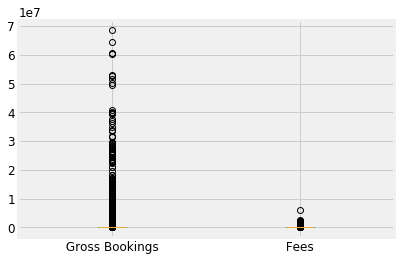

In [22]:
boxplot = EATSFin3.boxplot(column=[' Gross Bookings ', ' Fees '])

Based on this, it looks like there is a greater spread in ' Gross Bookings '. Outliers will be removed since this is  regression problem. Accurate regressions need to have outliers eliminated.

We will use zcore to drop outliers. Zscore: In this procedure, z-score is calculated for each observation. Any z-score greater than 3 or less than -3 is considered to be an outlier. This rule of thumb is based on the empirical rule. From this rule we see that almost all of the data (99.7%) should be within three standard deviations from the mean.

In [23]:
EATSFin4 = EATSFin3[(np.abs(stats.zscore(EATSFin3.drop(['Date', 'Vendor Name', 'Country', 'Product'], 
                                                       axis=1))) < 3).all(axis=1)]

To check that outliers removed:
1. new summary statistics should have max value > max value from previous df that still had outliers. 
2. new boxplot should not have points scattered in remote areas from mean and SD's

In [24]:
EATSFin4.describe()

Gross Bookings           Fees 
count      7.551000e+03    7551.000000
mean       1.614825e+05    6363.368809
std        7.249687e+05   25696.424125
min       -2.701010e+03      -0.290000
25%        7.196000e+01       2.960000
50%        2.284680e+03      97.100000
75%        3.630036e+04    1239.860000
max        8.956605e+06  357333.080000

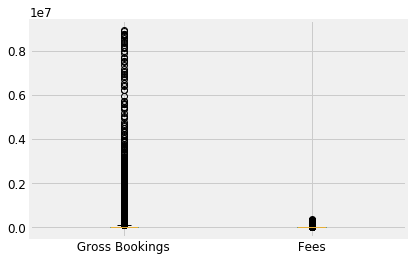

In [25]:
boxplot = EATSFin4.boxplot(column=[' Gross Bookings ', ' Fees '])

Yes, outliers removed! Spread is more compact for Gross Bookings and Fees.

In [26]:
EATSFin4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7551 entries, 0 to 7910
Data columns (total 6 columns):
Date                7551 non-null object
Vendor Name         7551 non-null object
Country             7547 non-null object
Product             7551 non-null object
 Gross Bookings     7551 non-null float64
 Fees               7551 non-null float64
dtypes: float64(2), object(4)
memory usage: 412.9+ KB


Now, we are going to convert the 'Date' column from non-null object to Python's date time format.

In [27]:
from datetime import datetime
EATSFin4['Date'] =  pd.to_datetime(EATSFin4['Date'],
                              format='%m/%d/%y')

Confirming 'Date' column changed from non-null object to datetime.

In [28]:
EATSFin4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7551 entries, 0 to 7910
Data columns (total 6 columns):
Date                7551 non-null datetime64[ns]
Vendor Name         7551 non-null object
Country             7547 non-null object
Product             7551 non-null object
 Gross Bookings     7551 non-null float64
 Fees               7551 non-null float64
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 412.9+ KB


Yes! Confirmed datetime.

Also confirming float types in order to properly calculate new percentage column.
At this point, need to add new column, "% Gross Bookings" to edited dataframe.

In [29]:
#Need to get total amount from ' Gross Bookings ' to use in new column calculation
gross_sum = EATSFin4[' Gross Bookings '].sum()

In [30]:
gross_sum

1219353980.27

In [31]:
#Creating '% Gross Bookings' column. 
EATSFin4['% Gross Bookings'] = (EATSFin4[' Gross Bookings '] / gross_sum) *100

In [32]:
EATSFin4.head()

Date Vendor Name    Country    Product   Gross Bookings     Fees   \
0 2015-01-01    Vendor A  Country 1  Product 1             63.34     0.94   
1 2015-01-01    Vendor A  Country 2  Product 2          39295.41  2169.53   
2 2015-01-01    Vendor A  Country 3  Product 3            127.25     3.44   
3 2015-01-01    Vendor A  Country 4  Product 1              4.85     0.11   
4 2015-01-01    Vendor A  Country 5  Product 4           4734.94   171.13   

   % Gross Bookings  
0      5.194554e-06  
1      3.222642e-03  
2      1.043585e-05  
3      3.977516e-07  
4      3.883155e-04

I noticed that 'Date' column just got changed. Instead of being month/day/year(2 digits), it has become year(4 digits)-day-month. Need to verify this with tail end of dataframe.

In [33]:
EATSFin4.tail()

Date Vendor Name     Country     Product   Gross Bookings   \
7906 2016-04-01    Vendor A  Country 32   Product 9          29573.34   
7907 2016-04-01    Vendor A  Country 27   Product 2             79.98   
7908 2016-04-01    Vendor A  Country 37   Product 4         122769.70   
7909 2016-04-01    Vendor A  Country 28   Product 2            167.76   
7910 2016-04-01    Vendor A  Country 70  Product 14             23.35   

        Fees   % Gross Bookings  
7906   504.32          0.002425  
7907     6.79          0.000007  
7908  8156.34          0.010068  
7909    14.24          0.000014  
7910     1.12          0.000002

The 'Date' column has been changed to year(4 digits)-day-month. Keep this in mind as I analyze visualizations.

# Exploratory Data Analysis

After manually inspecting data, suspecting that each month's data may have varying amounts of data. This affects model building as accuracy of model depends on how even data is between dates. Will re-inspect data with date counts to see distribution of data.

In [34]:
EATSFin4_dategroups = EATSFin4.groupby(['Date'])

In [35]:
EATSFin4_dategroups.count()

Vendor Name  Country  Product   Gross Bookings    Fees   \
Date                                                                  
2015-01-01          297      297      297               297     297   
2015-02-01          304      304      304               304     304   
2015-03-01          321      321      321               321     321   
2015-04-01          325      325      325               325     325   
2015-05-01          350      350      350               350     350   
2015-06-01          366      366      366               366     366   
2015-07-01          359      359      359               359     359   
2015-08-01          475      474      475               475     475   
2015-09-01          483      482      483               483     483   
2015-10-01          492      491      492               492     492   
2015-11-01          578      577      578               578     578   
2015-12-01          594      594      594               594     594   
2016-01-01          616      616      616               616     616   
2016-02-01          659      659      659               659     659   
2016-03-01          663      663      663               663     663   
2016-04-01          669      669      669               669     669   

            % Gross Bookings  
Date                          
2015-01-01               297  
2015-02-01               304  
2015-03-01               321  
2015-04-01               325  
2015-05-01               350  
2015-06-01               366  
2015-07-01               359  
2015-08-01               475  
2015-09-01               483  
2015-10-01               492  
2015-11-01               578  
2015-12-01               594  
2016-01-01               616  
2016-02-01               659  
2016-03-01               663  
2016-04-01               669

As suspected, distribution of total datasets points is not the same month-to-month. There is a actually growth in datapoint density per month starting with around 300 at the beginning of dataset to doubling to around 600 at the end. At the same time, this is just a count and not a sum of data points.

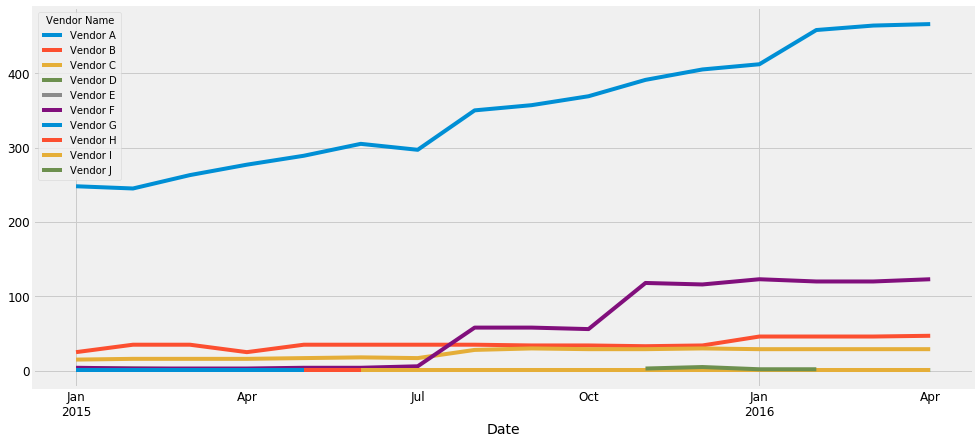

In [36]:
#Vendor Name vs. Time
fig, ax = plt.subplots(figsize=(15,7))

EATSFin4.groupby(['Date','Vendor Name']).count()['% Gross Bookings'].unstack().plot(ax=ax)

Vendor A is way above every other Vendor. And Vendor F is the next highly ranked though there is a huge separation between the two. These two vendors would be worth investing in.

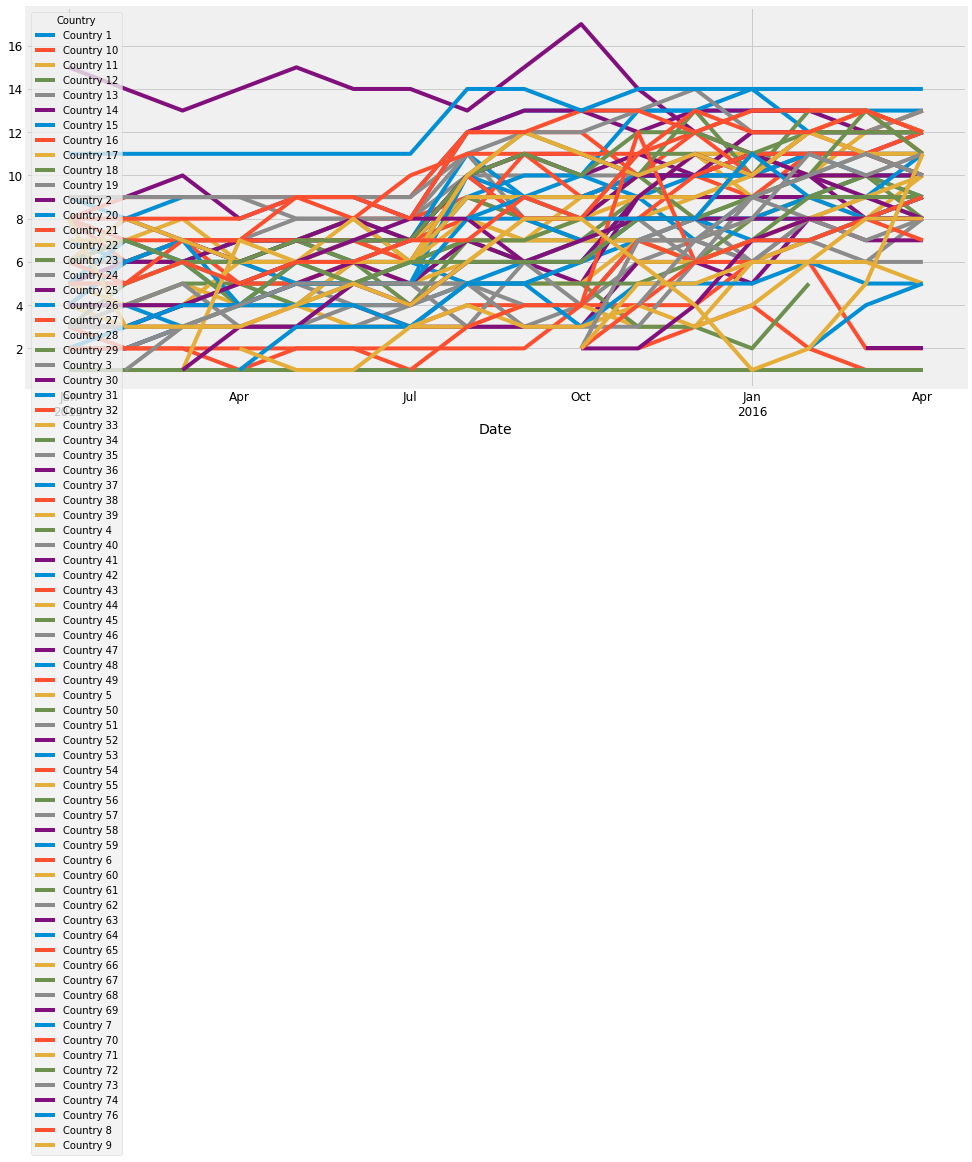

In [37]:
#Country vs. Time
fig, ax = plt.subplots(figsize=(15,7))


EATSFin4.groupby(['Date','Country']).count()['% Gross Bookings'].unstack().plot(ax=ax)

There are differences in how much each country contribute to '% Gross Bookings'. Most countries are above 2 units for '% Gross Bookings'.

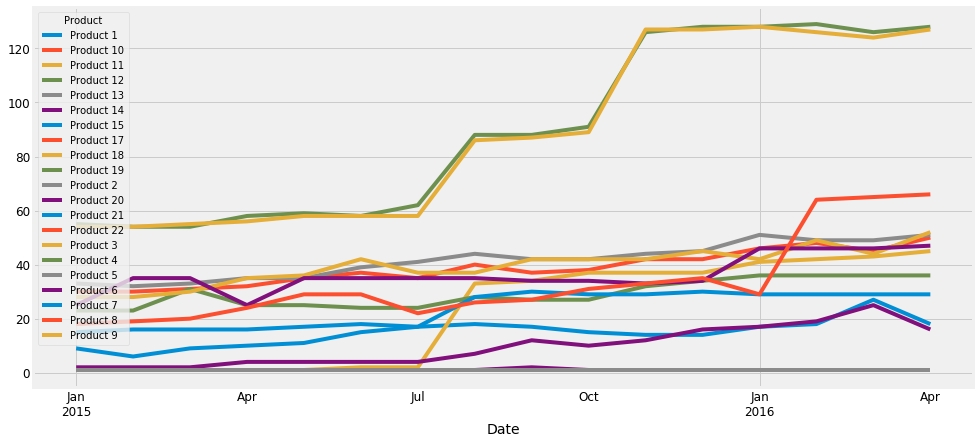

In [38]:
#Product vs. Time
fig, ax = plt.subplots(figsize=(15,7))


EATSFin4.groupby(['Date','Product']).count()['% Gross Bookings'].unstack().plot(ax=ax)

There are two products that are doing 3x better than the rest. Maybe a good idea to drop any products below 20 units. Looking at Fees that are tied to these products could strengthen argument to drop these low performing products.

## Categorizing the Problem:
Have labels --> Supervised Learning
## Categorizing by Output:
Output is a # --> Regression

### Model that will be used is:
Linear Regression since computing a continuous value.
Goal is to predict future value of process that has been run.

## Visualizing % Gross Bookings Time Series data

In [39]:
EATSFin4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7551 entries, 0 to 7910
Data columns (total 7 columns):
Date                7551 non-null datetime64[ns]
Vendor Name         7551 non-null object
Country             7547 non-null object
Product             7551 non-null object
 Gross Bookings     7551 non-null float64
 Fees               7551 non-null float64
% Gross Bookings    7551 non-null float64
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 471.9+ KB


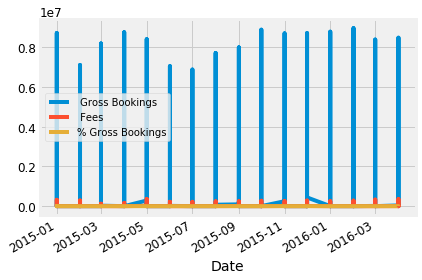

In [40]:
EATSFin4.set_index('Date').plot()

Some things to notice are that within 2015, there are dips in Gross Bookings in Feb, June, July and August. And for 2016, relative to 2015, 2016 has higher Gross Bookings at the beginning of its year.

Fees look even across the graph though this graph is not very granular. The same goes for % Gross Bookings. The values in this column as well as Fees column are very small compared to the values in Gross Bookings column.

There does not seem to show seasonality nor cyclical behavior nor any spikes nor any upper or lower trends across this data that spans over 1.3 years.

In [41]:
#Trying Time Series Forecasting with FB's Prophet